<a href="https://colab.research.google.com/github/xmorcinekp/Task1/blob/main/Task1_Morcinek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


## Data

In [12]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [13]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(<matplotlib.image.AxesImage at 0x7f81988caf90>, 9)

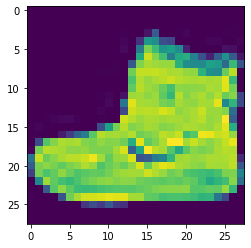

In [14]:
plt.imshow(x_train[0,:,:,0]), y_train[0] # x = array, y = indexy pro nazvy

## Plotting

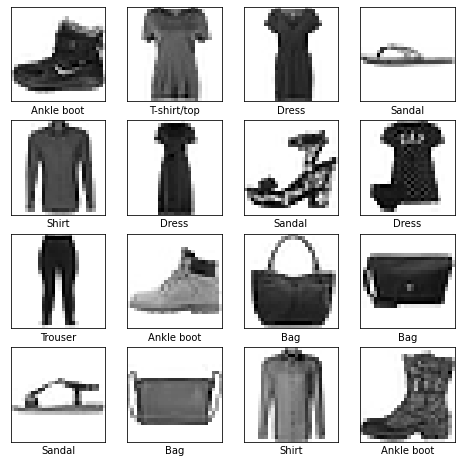

In [16]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])


## Dense Neural Network

In [20]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

In [21]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [ ]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), # array 2 vecotr
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


dnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
100480-128*784 # za kazdy ze 128 neuronu musis pridat 1 parametr navic za bias

128

In [ ]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256, # pocet obrazku, ktere naraz zpracuje = rychlost x pamet
  epochs = 20, # kolikrat cely dataset projdu behem optimalizace parametru
  validation_data = (x_test, y_test),
  verbose = 1
) # loss = crossentropy, accuracy = 79% urceno spravne, val_accuracy = na testovacich datech

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.6087 - accuracy: 0.7942 - val_loss: 0.4707 - val_accuracy: 0.8320
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8561 - val_loss: 0.4085 - val_accuracy: 0.8569
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3691 - accuracy: 0.8666 - val_loss: 0.3977 - val_accuracy: 0.8588
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8774 - val_loss: 0.3772 - val_accuracy: 0.8654
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3205 - accuracy: 0.8848 - val_loss: 0.3598 - val_accuracy: 0.8741
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3032 - accuracy: 0.8891 - val_loss: 0.3521 - val_accuracy: 0.8741
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2904 - accuracy: 0.8933 - val_loss: 0.3623 - val_accuracy: 0.8713
Epoch 

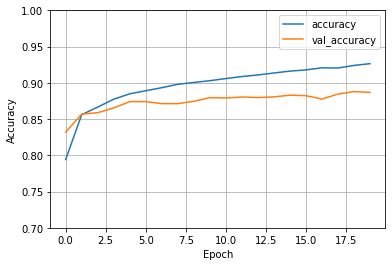

In [ ]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

new_param = old_param + learning_rate*grad

**Change: increase the number of epoches**

In [ ]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), # array 2 vecotr
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 40,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/40
235/235 [==============================] - 2s 5ms/step - loss: 0.6162 - accuracy: 0.7882 - val_loss: 0.4681 - val_accuracy: 0.8358
Epoch 2/40
235/235 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8573 - val_loss: 0.4154 - val_accuracy: 0.8539
Epoch 3/40
235/235 [==============================] - 1s 4ms/step - loss: 0.3681 - accuracy: 0.8685 - val_loss: 0.3821 - val_accuracy: 0.8646
Epoch 4/40
235/235 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8757 - val_loss: 0.3725 - val_accuracy: 0.8651
Epoch 5/40
235/235 [==============================] - 1s 4ms/step - loss: 0.3175 - accuracy: 0.8850 - val_loss: 0.3589 - val_accuracy: 0.8719
Epoch 6/40
235/235 [==============================] - 1s 4ms/step - loss: 0.3068 - accuracy: 0.8881 - val_loss: 0.3445 - val_accuracy: 0.8764
Epoch 7/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2898 - accuracy: 0.8948 - val_loss: 0.3446 - val_accuracy: 0.8720
Epoch 

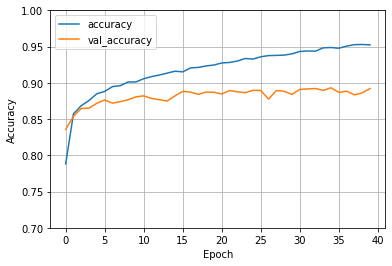

In [ ]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

val_accuracy increased a bit, but not significantly.

**Change: increase the number of layers**

In [ ]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), # array 2 vecotr
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


dnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.7083 - accuracy: 0.7549 - val_loss: 0.4973 - val_accuracy: 0.8263
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4183 - accuracy: 0.8534 - val_loss: 0.4156 - val_accuracy: 0.8563
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.8678 - val_loss: 0.4117 - val_accuracy: 0.8566
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.8743 - val_loss: 0.3799 - val_accuracy: 0.8666
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.8814 - val_loss: 0.3577 - val_accuracy: 0.8735
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3133 - accuracy: 0.8874 - val_loss: 0.3588 - val_accuracy: 0.8749
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2981 - accuracy: 0.8917 - val_loss: 0.3489 - val_accuracy: 0.8751
Epoch 

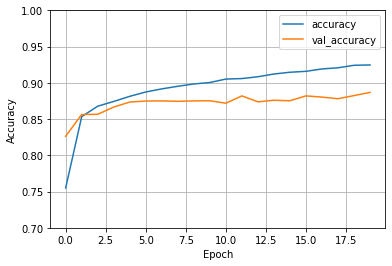

In [ ]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

val_accuracy did not improve, bonus layer was not necessary.

**Change: increase the number of neurons in the second layer.**

In [ ]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), # array 2 vector
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


dnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.5940 - accuracy: 0.7972 - val_loss: 0.4641 - val_accuracy: 0.8351
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4041 - accuracy: 0.8575 - val_loss: 0.4056 - val_accuracy: 0.8573
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.8717 - val_loss: 0.3884 - val_accuracy: 0.8598
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3293 - accuracy: 0.8811 - val_loss: 0.3869 - val_accuracy: 0.8628
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3085 - accuracy: 0.8891 - val_loss: 0.3643 - val_accuracy: 0.8679
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2974 - accuracy: 0.8913 - val_loss: 0.3467 - val_accuracy: 0.8726
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2823 - accuracy: 0.8957 - val_loss: 0.3432 - val_accuracy: 0.8763
Epoch 

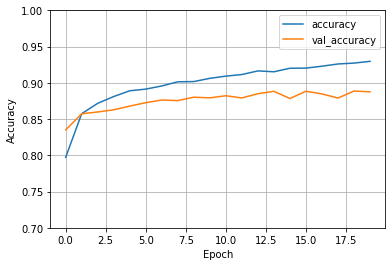

In [ ]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

val_accuracy seems to be similar as in the previsous case.

**Change: decrease the number of neurons in the second layer.**

In [ ]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), # array 2 vector
      layers.Dense(128, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


dnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.6251 - accuracy: 0.7860 - val_loss: 0.4761 - val_accuracy: 0.8327
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.8515 - val_loss: 0.4185 - val_accuracy: 0.8515
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3738 - accuracy: 0.8665 - val_loss: 0.3926 - val_accuracy: 0.8600
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3479 - accuracy: 0.8761 - val_loss: 0.3948 - val_accuracy: 0.8571
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.8825 - val_loss: 0.3696 - val_accuracy: 0.8692
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8843 - val_loss: 0.3676 - val_accuracy: 0.8683
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3013 - accuracy: 0.8903 - val_loss: 0.3597 - val_accuracy: 0.8709
Epoch 

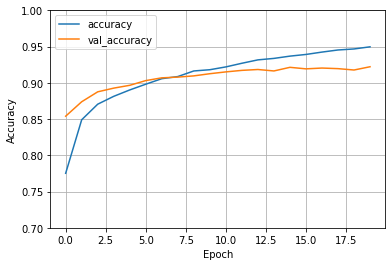

In [25]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

val_accuracy seems to be a bit worse than for the 64 neurons.

## Convolutional Neural Network

In [22]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5), # polovinu vstupu odstrel, kvuli overfitting
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

pocet param = pocet filtru * (N+N+1)

In [23]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 36s 24ms/step - loss: 0.6388 - accuracy: 0.7752 - val_loss: 0.4002 - val_accuracy: 0.8540
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 0.4209 - accuracy: 0.8490 - val_loss: 0.3457 - val_accuracy: 0.8739
Epoch 3/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3604 - accuracy: 0.8705 - val_loss: 0.3090 - val_accuracy: 0.8876
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3257 - accuracy: 0.8814 - val_loss: 0.2889 - val_accuracy: 0.8927
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3027 - accuracy: 0.8902 - val_loss: 0.2848 - val_accuracy: 0.8966
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 0.2780 - accuracy: 0.8981 - val_loss: 0.2676 - val_accuracy: 0.9031
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 0.2583 - accuracy: 0.9057 - val_loss: 0.2645 - val_accuracy: 0.906

mse + c*sum(w*w) (laso regrese, penalty)

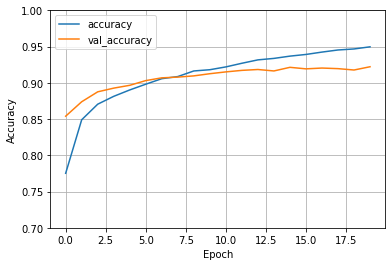

In [26]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

**Change: new layer**

In [27]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5), # polovinu vstupu odstrel, kvuli overfitting
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [28]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 7s 26ms/step - loss: 0.6896 - accuracy: 0.7583 - val_loss: 0.3966 - val_accuracy: 0.8559
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 0.4172 - accuracy: 0.8539 - val_loss: 0.3406 - val_accuracy: 0.8781
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3545 - accuracy: 0.8750 - val_loss: 0.3092 - val_accuracy: 0.8890
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3117 - accuracy: 0.8895 - val_loss: 0.2878 - val_accuracy: 0.8910
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2850 - accuracy: 0.8984 - val_loss: 0.2845 - val_accuracy: 0.8949
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2588 - accuracy: 0.9083 - val_loss: 0.2666 - val_accuracy: 0.9028
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2354 - accuracy: 0.9155 - val_loss: 0.2522 - val_accuracy: 0.9100

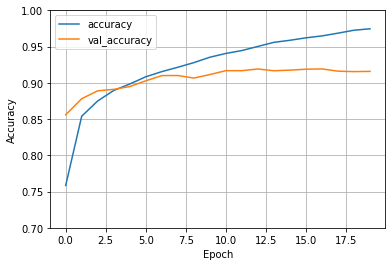

In [29]:
plot_loss(history, ylim=(0.7, 1))

val_accuracy seems to be a bit worse than in previous case.